# Gym Membership Retention Analysis

# Introduction

This analysis investigates patterns in gym membership data to improve retention rates and maximize member satisfaction and engagement. Using data from a fitness center, the analysis examines how factors like member demographics, attendance, membership duration, and membership type influence member retention. By analyzing these trends, the study aims to assist the gym in making data-driven decisions to enhance membership experiences and retention rates.

# Problem Statement

The fitness industry faces significant challenges with membership retention, as many gyms struggle to retain members beyond the initial few months. High turnover affects revenue stability and makes long-term growth challenging. This study seeks to identify factors contributing to membership churn, enabling the gym to create targeted retention strategies and improve member satisfaction.

# Aim of the Project

The primary goal of this project is to analyze gym membership data to identify factors influencing retention and churn. Specifically, the project aims to: Understand the demographic and behavioral characteristics of retained vs. churned members.
Analyze attendance and usage patterns to identify trends among loyal members.
Provide actionable insights and recommendations for improving retention rates based on data analysis.

# Exploratory Data Analysis (EDA) Findings

The EDA revealed several trends and relationships between member characteristics and gym engagement:

Demographic Insights: Age, gender, and membership type had significant correlations with retention rates. Younger members tended to have shorter membership durations, while older members showed higher retention.
Membership Type and Duration: Members with long-term memberships (e.g., annual) demonstrated higher retention rates compared to monthly memberships, likely due to a commitment factor and a cost-saving incentive.
Attendance Patterns: Frequent gym users were more likely to renew memberships, indicating that higher engagement correlates with longer membership duration.
Seasonal Trends: A spike in new memberships was observed around the beginning of the year, while cancellations were higher during the mid-year months.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [5]:
data = pd.read_csv('~/Desktop/projects/gym_membership.csv')

print(data.head())

   id  gender    birthday  Age abonoment_type  visit_per_week  \
0   1  Female  1997-04-18   27        Premium               4   
1   2  Female  1977-09-18   47       Standard               3   
2   3    Male  1983-03-30   41        Premium               1   
3   4    Male  1980-04-12   44        Premium               3   
4   5    Male  1980-09-10   44       Standard               2   

        days_per_week  attend_group_lesson            fav_group_lesson  \
0  Mon, Sat, Tue, Wed                 True  Kickboxen, BodyPump, Zumba   
1       Mon, Sat, Wed                False                         NaN   
2                 Sat                 True                       XCore   
3       Sat, Tue, Wed                False                         NaN   
4            Thu, Wed                 True        Running, Yoga, Zumba   

  avg_time_check_in avg_time_check_out  avg_time_in_gym  drink_abo  \
0          19:31:00           21:27:00              116      False   
1          19:31:00     

In [6]:
data.shape

(1000, 17)

In [7]:
data.describe()

,id,Age,visit_per_week,avg_time_in_gym
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,30.604000,2.682000,105.260000
std,288.819436,10.817958,1.241941,43.557177
min,1.000000,12.000000,1.000000,30.000000
25%,250.750000,21.000000,2.000000,67.000000
50%,500.500000,30.000000,3.000000,104.000000
75%,750.250000,40.000000,3.000000,143.000000
max,1000.000000,49.000000,5.000000,180.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   int64 
 1   gender                 1000 non-null   object
 2   birthday               1000 non-null   object
 3   Age                    1000 non-null   int64 
 4   abonoment_type         1000 non-null   object
 5   visit_per_week         1000 non-null   int64 
 6   days_per_week          1000 non-null   object
 7   attend_group_lesson    1000 non-null   bool  
 8   fav_group_lesson       503 non-null    object
 9   avg_time_check_in      1000 non-null   object
 10  avg_time_check_out     1000 non-null   object
 11  avg_time_in_gym        1000 non-null   int64 
 12  drink_abo              1000 non-null   bool  
 13  fav_drink              496 non-null    object
 14  personal_training      1000 non-null   bool  
 15  name_personal_trainer 

In [10]:
#Gender distribution
gender_counts = data['gender'].value_counts()
gender_counts

gender
Female    503
Male      497
Name: count, dtype: int64

C:\Users\ERNEST\AppData\Local\Temp\ipykernel_16572\3635588043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='gender', palette='Set2')


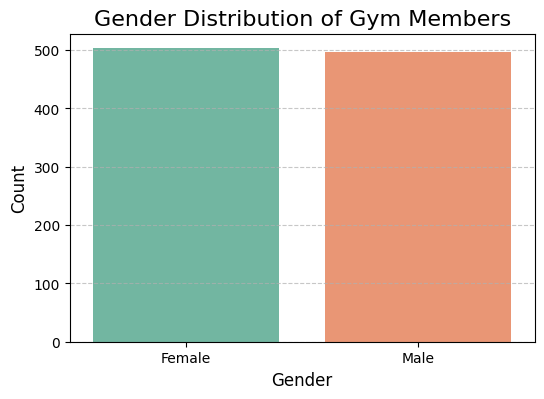

In [13]:
# 2. Gender distribution (bar plot)
plt.figure(figsize=(6, 4))
sns.countplot(data, x='gender', palette='Set2')
plt.title('Gender Distribution of Gym Members', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on y-axis
plt.show()

In [19]:
print(data[['gender', 'Age']])

     gender  Age
0    Female   27
1    Female   47
2      Male   41
3      Male   44
4      Male   44
..      ...  ...
995  Female   40
996  Female   15
997    Male   40
998    Male   23
999  Female   18

[1000 rows x 2 columns]


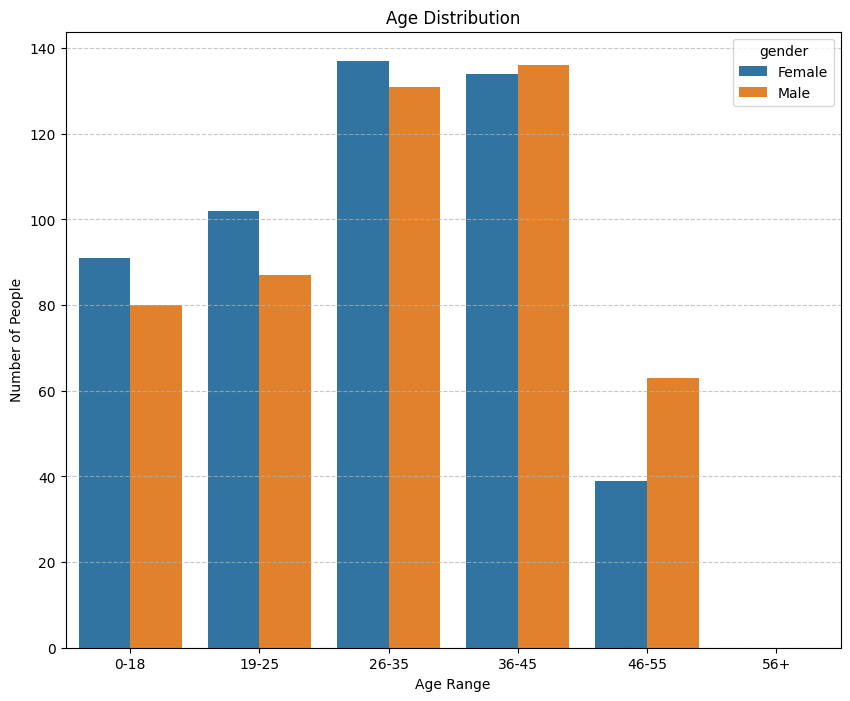

In [43]:
bins = [0, 18, 25, 35, 45, 55, 56]  # You can adjust the ranges as needed
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56+']
age_range = pd.cut(df['Age'], bins=bins, labels=labels)
df["age_range"] = age_range
plt.figure(figsize=(10, 8))
sns.countplot(df, x="age_range", hue="gender")
plt.title("Age Distribution")
plt.xlabel("Age Range")
plt.ylabel("Number of People")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
df = data.drop(["birthday", "name_personal_trainer", "id"], axis=1)
trainer = data["name_personal_trainer"].value_counts()

# Print the trainer counts
print(trainer)

name_personal_trainer
Chantal    153
Mike       140
Hanna      114
Jeffrey    111
Name: count, dtype: int64


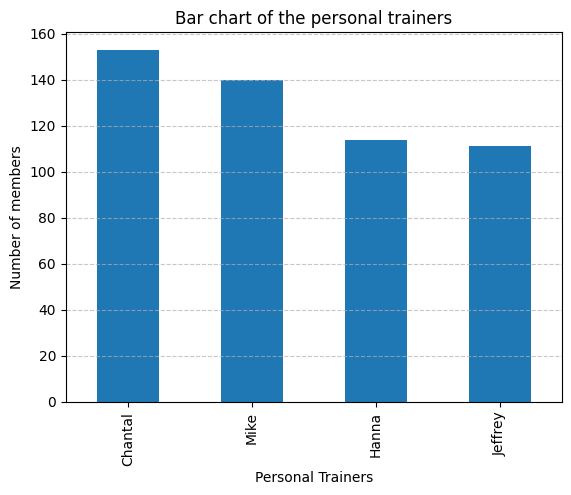

In [25]:
df = data.drop(["birthday", "name_personal_trainer", "id"], axis=1)
trainer = data["name_personal_trainer"].value_counts()
trainer.plot(kind="bar")
plt.title("Bar chart of the personal trainers")
plt.xlabel("Personal Trainers")
plt.ylabel("Number of members")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

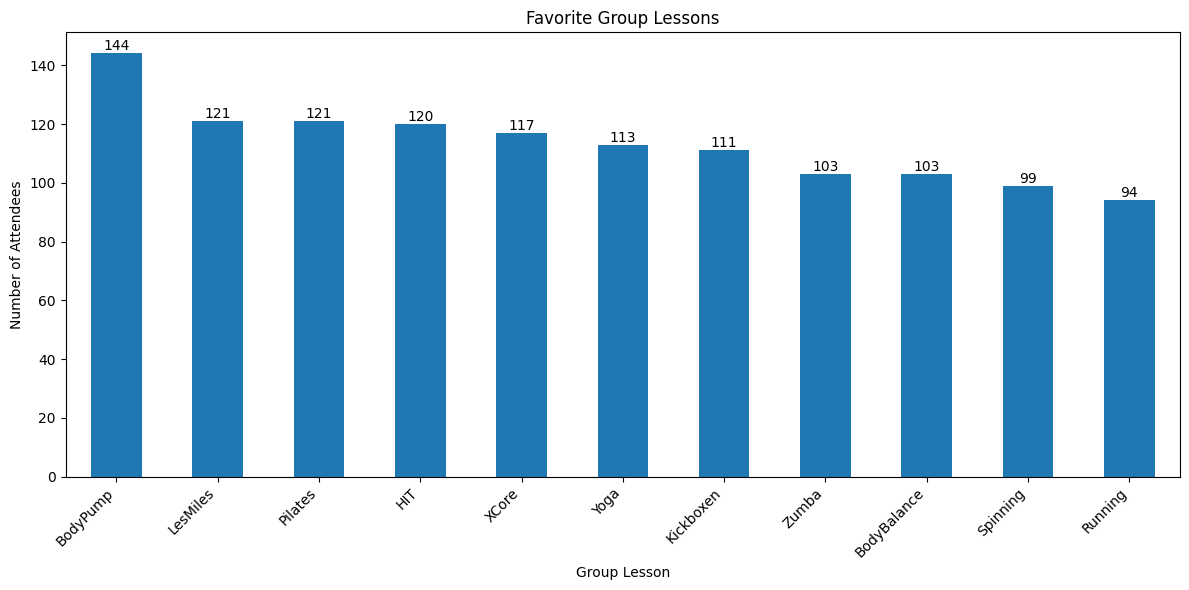

In [30]:
# Favorite Group Lesson
def count_group_lessons(series):
    lessons = [lesson.strip() for items in series.dropna() for lesson in items.split(',')]
    return pd.Series(lessons).value_counts()

# Counting the occurrences of each group lesson
lesson_counts = count_group_lessons(data[data['attend_group_lesson'] == True]['fav_group_lesson'])

# Creating a bar plot
plt.figure(figsize=(12, 6))
lesson_counts.plot(kind='bar')
plt.title('Favorite Group Lessons')
plt.xlabel('Group Lesson')
plt.ylabel('Number of Attendees')
plt.xticks(rotation=45, ha='right')

# Adding value labels on top of each bar
for i, v in enumerate(lesson_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

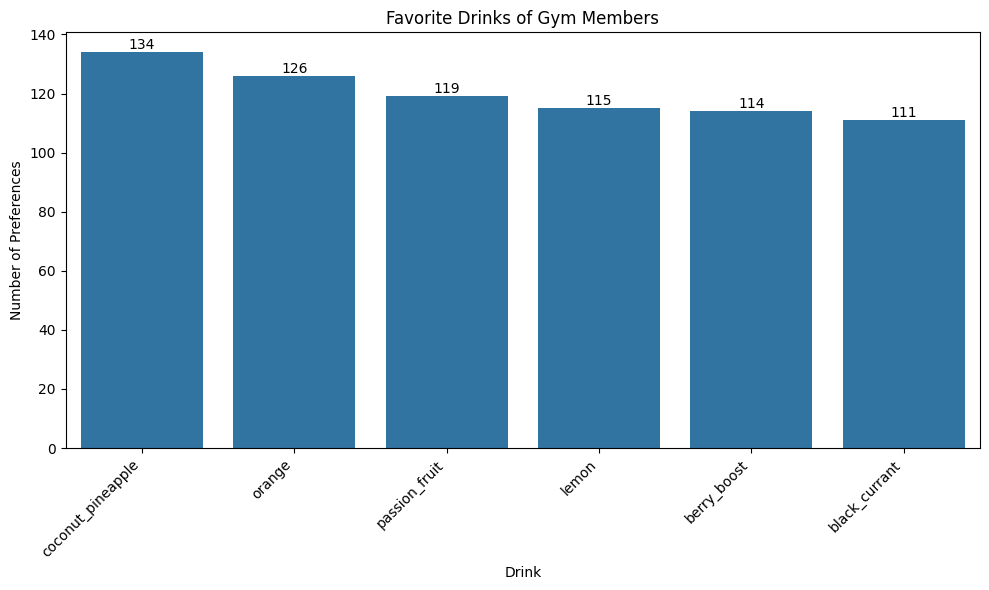

In [29]:
# Favourite Sport Drink

# Spliting the multiple drinks and create a new row for each drink
data['fav_drink'] = data['fav_drink'].str.split(', ')
data = data.explode('fav_drink')

# Counting the occurrences of each drink
drink_counts = data['fav_drink'].value_counts().reset_index()
drink_counts.columns = ['Drink', 'Count']

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Drink', y='Count', data=drink_counts)

# Customizing the plot
plt.title('Favorite Drinks of Gym Members')
plt.xlabel('Drink')
plt.ylabel('Number of Preferences')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding value labels on top of each bar
for i, v in enumerate(drink_counts['Count']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjusting layout to prevent cut-off labels
plt.tight_layout()

# Showing the plot
plt.show()

In [53]:
day_analyses = {}
day_analyses = {day: 0 for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}
day_analyses

day_per_week = df['days_per_week'].value_counts().reset_index()
day_per_week

for index, row in day_per_week.iterrows():
    days = row['days_per_week'].split(', ') 
    count = row['count']
    for day in days:
        day_analyses[day] += count 
        
day_df = pd.DataFrame(day_analyses.items(), columns = ["Day", "Count"])
day_df

,Day,Count
0,Mon,349
1,Tue,391
2,Wed,400
3,Thu,379
4,Fri,376
5,Sat,380
6,Sun,407


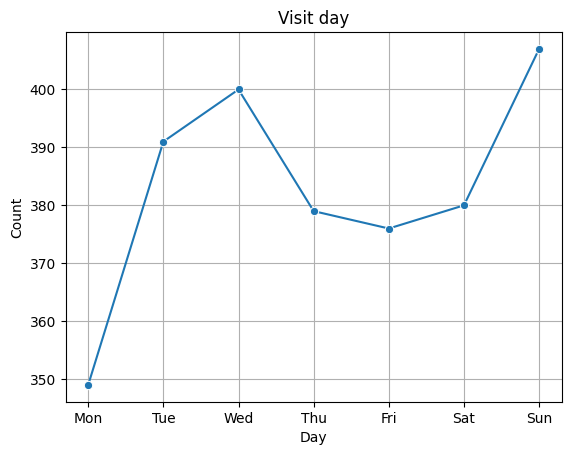

In [55]:
sns.lineplot(x = 'Day', y = 'Count', data = day_df, marker = "o")
plt.title("Visit day")
plt.grid(True)
plt.show()

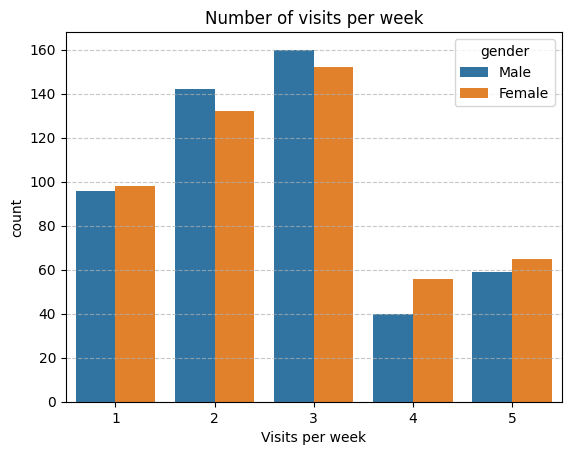

In [34]:
sns.countplot(df, x="visit_per_week", hue="gender")
plt.xlabel("Visits per week")
plt.title("Number of visits per week")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
gender_days = df.groupby("gender")['visit_per_week'].value_counts().reset_index()
gender_days

,gender,visit_per_week,count
0,Female,3,152
1,Female,2,132
2,Female,1,98
3,Female,5,65
4,Female,4,56
5,Male,3,160
6,Male,2,142
7,Male,1,96
8,Male,5,59
9,Male,4,40


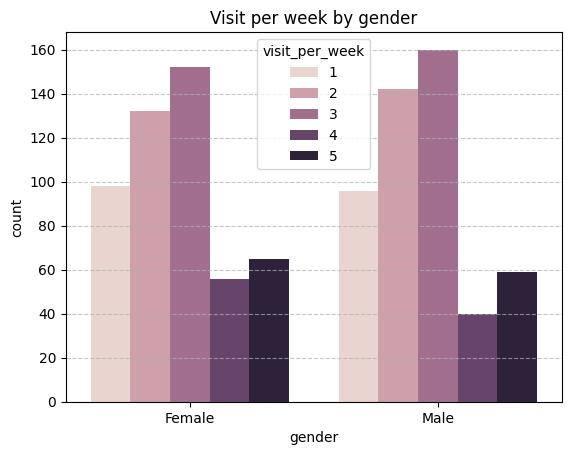

In [49]:
sns.barplot(x = "gender", y = "count", hue = "visit_per_week", data = gender_days)
plt.title("Visit per week by gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
gender_abonoment = df.groupby("gender")["abonoment_type"].value_counts().reset_index()
gender_abonoment

,gender,abonoment_type,count
0,Female,Standard,261
1,Female,Premium,242
2,Male,Premium,251
3,Male,Standard,246


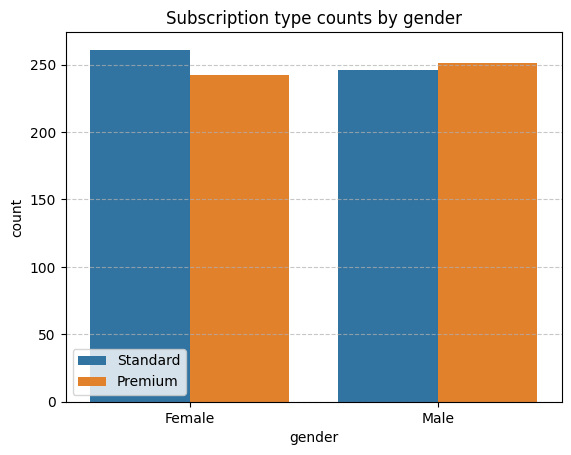

In [46]:
sns.barplot(x = "gender", y = "count", hue = "abonoment_type", data = gender_abonoment)
plt.legend(loc='lower left', bbox_to_anchor=(0, 0))
plt.title("Subscription type counts by gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [57]:
df_ = pd.read_csv('gym_membership.csv')

C:\Users\ERNEST\AppData\Local\Temp\ipykernel_16572\1380370171.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_['avg_time_in_gym'], shade = True, color='blue')


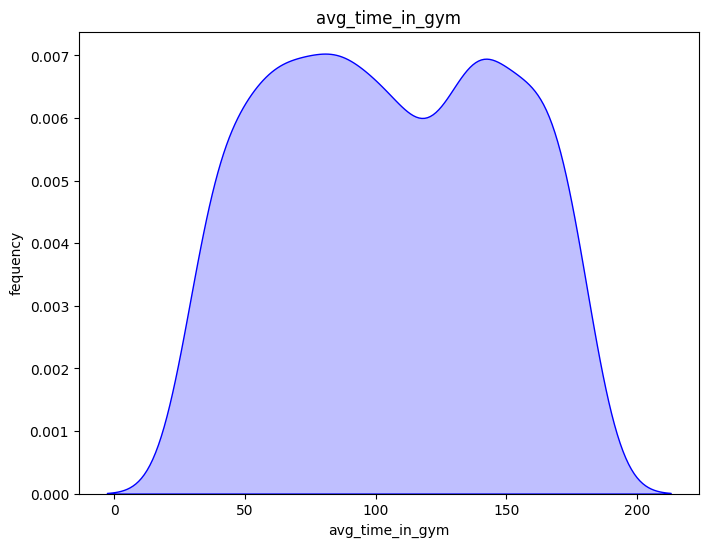

In [59]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=df_['avg_time_in_gym'], shade = True, color='blue')
plt.title("avg_time_in_gym")
plt.xlabel("avg_time_in_gym")
plt.ylabel("fequency")
plt.show()

# Key Insights

Based on the EDA, several key insights were identified:

Commitment Level Matters: Members on long-term plans (e.g., annual memberships) showed stronger retention, suggesting that longer membership plans could drive loyalty.
Age and Retention Correlation: Older members are generally more consistent in maintaining their memberships, whereas younger members are more prone to churn.
Engagement Drives Retention: Members who attend the gym more frequently are more likely to stay, suggesting that engagement initiatives could be vital to improving retention.
Seasonal Significance: Membership renewals and cancellations follow a predictable seasonal trend, with opportunities to promote loyalty programs at the start of the year and implement retention strategies mid-year.


# Recommendations

Based on the analysis, the following recommendations are proposed:

Promote Long-Term Membership Plans: Encourage members to sign up for annual or semi-annual memberships by offering discounts or added benefits, leveraging the higher retention rates seen among these memberships.
Targeted Retention Programs for Younger Members: Develop engagement campaigns specifically for younger members, such as personalized workout plans, social events, and targeted communications to enhance their connection to the gym.
Increase Member Engagement: Implement programs like fitness challenges, member recognition events, or rewards for consistent attendance to increase gym engagement and encourage frequent usage.
Seasonal Retention Campaigns: Run loyalty and engagement campaigns during the mid-year, when churn rates are highest, and utilize the early year influx to introduce retention-focused programs from the start.


# Conclusion

This analysis highlights the factors influencing gym membership retention, including membership type, member demographics, and attendance frequency. By implementing targeted strategies that encourage engagement and cater to member needs, the gym can foster a more loyal membership base. With strategic initiatives based on these insights, the fitness center can improve member retention, contributing to long-term growth and member satisfaction.